<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_general2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [51]:
def spline_cuadratico(X,Y,n):
    A=np.zeros((3*n-3,3*n-3))
    A[0][0]=2
    b=np.zeros(3*n-3)
    for i in range(0,n-1):
        if(i==0):
            A[1][0]=X[0]**2
            A[1][1]=X[0]
            A[1][2]=1
            b[1]=Y[0]
        else:
            A[2*i][3*(i-1)]=X[i]**2
            A[2*i][3*(i-1)+1]=X[i]
            A[2*i][3*(i-1)+2]=1
            A[2*i+1][3*i]=X[i]**2
            A[2*i+1][3*i+1]=X[i]
            A[1+2*i][3*i+2]=1
            b[2*i]=Y[i]
            b[2*i+1]=Y[i]
    A[2*n-2][3*i]=X[i+1]**2
    A[2*n-2][3*i+1]=X[i+1]
    A[2*n-2][3*i+2]=1
    b[2*n-2]=Y[n-1]
    for j in range(0,n-2):
        A[2*n-1+j][3*j]=2*X[j+1]
        A[2*n-1+j][3*j+1]=1
        A[2*n-1+j][3*j+3]=-2*X[j+1]
        A[2*n-1+j][3*j+4]=-1
    print("Matriz:\n",A)
    sol=np.linalg.solve(A,b)#Usando numpy
    print("coeficientes:\n")
    for j in range(n-1):
        print("a_"+str(j)+"=",sol[3*j])
        print("b_"+str(j)+"=",sol[3*j+1])
        print("c_"+str(j)+"=",sol[3*j+2])
    return sol
X=[1,2,2.5,3,4]
Y=[1,5,7,8,2]
n=len(X)
sol=spline_cuadratico(X,Y,n)

Matriz:
 [[ 2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    1.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 4.    2.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    4.    2.    1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    6.25  2.5   1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    6.25  2.5   1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    9.    3.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    9.    3.    1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   16.    4.    1.  ]
 [ 4.    1.    0.   -4.   -1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    5.    1.    0.   -5.   -1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    6.    1.    0.   -6.   -1.    0.  ]]
coeficientes:

a_0= 0.0
b_0= 4.0
c_0= -3.0
a_1= -6.7501559897209515e-15
b_1= 4.00000000000

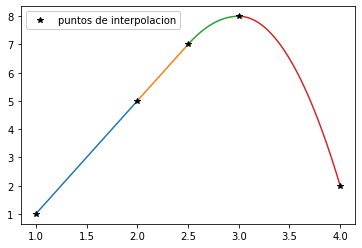

In [52]:
import matplotlib.pyplot as plt
for i in range(n-1):
    x_0=X[i]
    x_s=np.linspace(x_0,X[i+1],32)
    plt.plot(x_s,sol[3*i]*x_s**2+sol[3*i+1]*x_s+sol[3*i+2])
plt.plot(X,Y,'k*',label='puntos de interpolacion')
plt.legend(framealpha=1, frameon=True);